In [1]:
from __future__ import absolute_import, division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import Model, layers

import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
print(len(tf.config.list_physical_devices('GPU')),'\n')
%load_ext tensorboard

1 



## Import data : 

In [2]:
from tensorflow.keras.datasets import fashion_mnist  

In [3]:
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()
print(f'x_train_full : {x_train_full.shape}, x_test : {x_test.shape}')

x_train_full : (60000, 28, 28), x_test : (10000, 28, 28)


In [4]:
x_train_full.dtype

dtype('uint8')

### Scalling the inpute features also taking validation set from train data :

In [5]:
X_val, X_train = x_train_full[:5000] / 255., x_train_full[5000:]/255.
y_val, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
X_val.shape

(5000, 28, 28)

In [7]:
y_val.shape

(5000,)

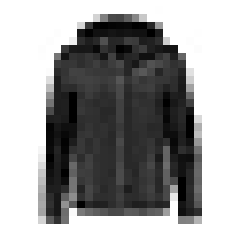

In [8]:
plt.imshow(X_train[0], cmap ='binary')
plt.axis('off')
plt.show()

### for Fashion MNIST, we need the list of class names to know what we are dealing with:

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

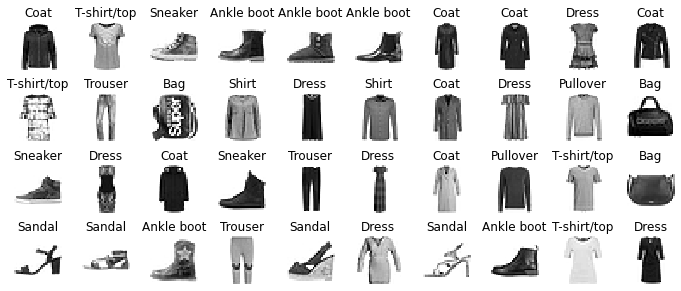

In [10]:

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

## Creating the Model Using the Sequential API :

In [11]:
model = tf.keras.models.Sequential([layers.Flatten(input_shape = [28, 28]), 
                                    layers.Dense(300, activation = "relu"),
                                    layers.Dense(100, activation = "relu"),
                                    layers.Dense(10, activation = "softmax") 
                                   ])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
list(model.layers)

In [13]:
# tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes = True)

In [14]:
model.layers[1].name

'dense'

In [15]:
model.layers[2].name

'dense_1'

In [16]:
model.layers[3].name

'dense_2'

In [17]:
model.get_layer('dense_2').name

'dense_2'

In [18]:
hidden1 = model.layers[1]
hidden1.name

'dense'

All the parameters of a layer can be accessed using its __get_weights( )__ and __set_weights( )__ method

In [19]:
weights, biases = hidden1.get_weights()
weights

array([[-0.00208253, -0.01461661,  0.01868293, ..., -0.00256483,
         0.00767796,  0.0134216 ],
       [ 0.01034805, -0.03115301, -0.00671663, ..., -0.0626535 ,
         0.01202036,  0.06928927],
       [ 0.07364346,  0.06889346,  0.06786875, ..., -0.03008759,
        -0.06137975,  0.01374114],
       ...,
       [ 0.0229257 ,  0.05543664,  0.03221191, ...,  0.02030464,
         0.02449396,  0.00161537],
       [ 0.02802682, -0.03687558, -0.0332178 , ...,  0.02514081,
         0.02523295, -0.04418279],
       [-0.06500506, -0.00549396,  0.00837092, ..., -0.0020678 ,
         0.06910948, -0.00043332]], dtype=float32)

In [20]:
weights.shape

(784, 300)

In [21]:
print(biases)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [22]:
biases.shape

(300,)

In [23]:
model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = 'sgd', 
              metrics = ['accuracy'])

In [24]:
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_val, y_val))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7153 - accuracy: 0.7660 - val_loss: 0.5358 - val_accuracy: 0.8196
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4866 - accuracy: 0.8303 - val_loss: 0.4947 - val_accuracy: 0.8324
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4437 - accuracy: 0.8431 - val_loss: 0.4658 - val_accuracy: 0.8382
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4169 - accuracy: 0.8537 - val_loss: 0.4063 - val_accuracy: 0.8616
Epoch 5/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3977 - accuracy: 0.8614 - val_loss: 0.4157 - val_accuracy: 0.8528
Epoch 6/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3832 - accuracy: 0.8659 - val_loss: 0.3851 - val_accuracy: 0.8678
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3689 - accuracy: 0.8706 - val_loss: 0.3874 - val_accuracy:

In [25]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [26]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

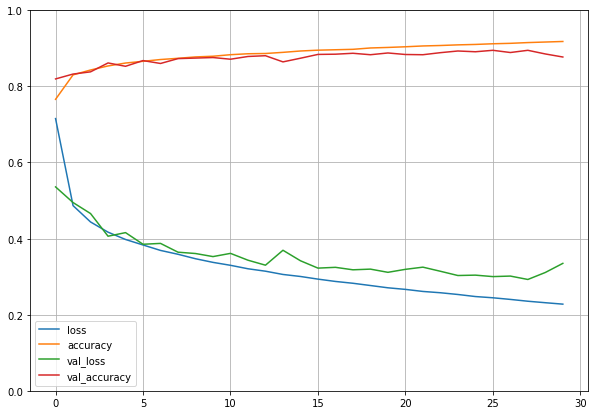

In [28]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize = (10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [29]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 66.5783 - accuracy: 0.8471
[66.57828521728516, 0.847100019454956]


In [30]:
X_new = x_test[:3]
y_proba = model.predict(X_new)
print(y_proba.round(2))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


__Warning__ : <br>
 ```model.predict_classes(X_new) is deprecated. It is replaced with np.argmax(model.predict(X_new), axis=-1).```

In [32]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis = -1)
y_pred

array([9, 2, 1], dtype=int64)

In [33]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [34]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

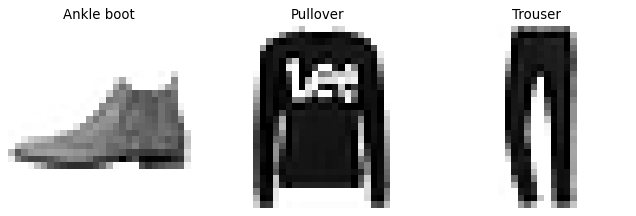

In [35]:
plt.figure(figsize = (10, 7), dpi = 80)
for idx, image in enumerate(X_new) :
    plt.subplot(1, 3, idx + 1)
    plt.imshow(image, cmap = 'binary', interpolation = 'nearest')
    plt.axis('off')
    plt.title(class_names[y_test[idx]], fontsize = 12)
plt.subplots_adjust(wspace = .2, hspace = .5)
plt.show()